# Many tiny pingüinos

I'm using the package `ggimage` to use penguin pictures (from http://phylopic.org/) instead of points in a scattergram.

## Get packages and data

In [1]:
#install.packages("tidytuesdayR")
#install.packages("tidyverse")
#install.packages("ggimage")
#install.packages ("rsvg")

library(tidytuesdayR)
library(tidyverse)
library(ggimage)
library(rsvg)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
tuesdata <- tidytuesdayR::tt_load('2020-07-28')
penguins <- tuesdata$penguins

--- Compiling #TidyTuesday Information for 2020-07-28 ----

--- There are 2 files available ---

--- Starting Download ---



--- Download complete ---



## Basic scatter plot of bill length vs bill depth

Warning message:
“Removed 2 rows containing missing values (geom_point).”


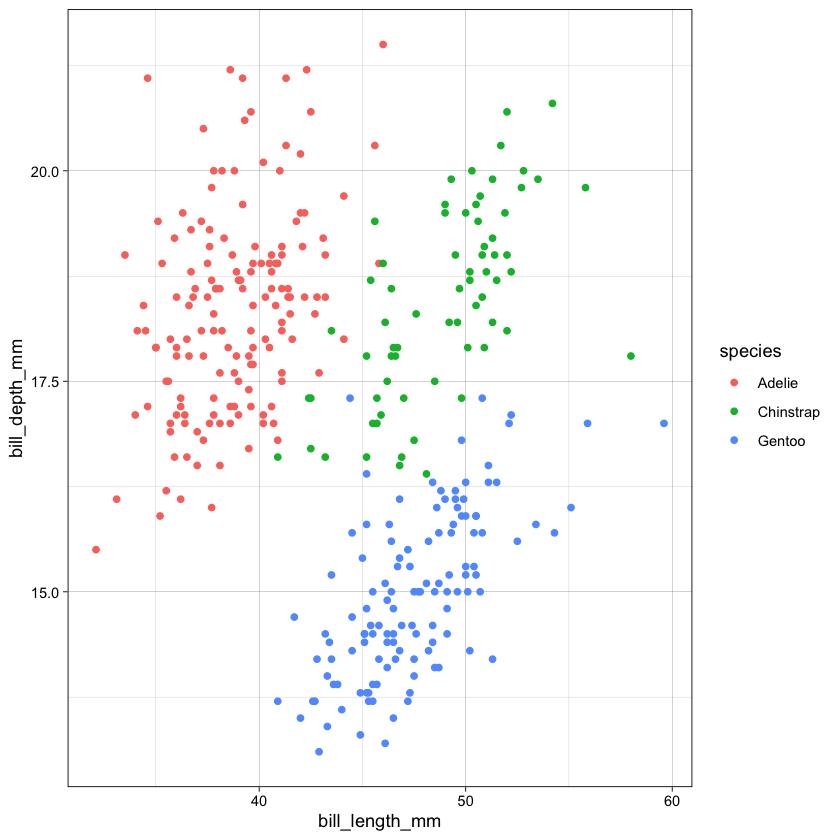

In [3]:
ggplot(data = penguins, aes(x = bill_length_mm, y = bill_depth_mm)) + 
  geom_point(aes(color=species)) + 
  theme_linedraw()

## Turn points into images

Images are from phylopic.org:

- Adelie illustration from [here](http://phylopic.org/image/693b84ab-7f2d-4dfd-8355-cbb8327c07fd/) is by Noah Schlottman, photo by Reinhard Jahn under this [license](http://creativecommons.org/licenses/by-nc-sa/3.0/).
- Gentoo illustration from [here](http://phylopic.org/image/a4112793-e464-4d6f-8bde-8976bcca100a/) is by Ferran Sayol.
- Chinstrap is actually an illustration of an [emperor penguin](http://phylopic.org/image/ef997bb0-14d8-4da3-abd1-25eab0d5eb61/) by Neil Kelley under this [license](http://creativecommons.org/licenses/by-nc-sa/3.0/)

### Assign image URLs by species

In [4]:
penguins_img <- penguins %>% mutate(image = case_when(species == "Adelie" ~ "http://phylopic.org/assets/images/submissions/693b84ab-7f2d-4dfd-8355-cbb8327c07fd.svg",
                                                      species == "Gentoo" ~ "http://phylopic.org/assets/images/submissions/a4112793-e464-4d6f-8bde-8976bcca100a.svg",
                                                      species == "Chinstrap" ~ "http://phylopic.org/assets/images/submissions/ef997bb0-14d8-4da3-abd1-25eab0d5eb61.svg",
                                                      TRUE ~ ""))

### Plot with image

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_image).”


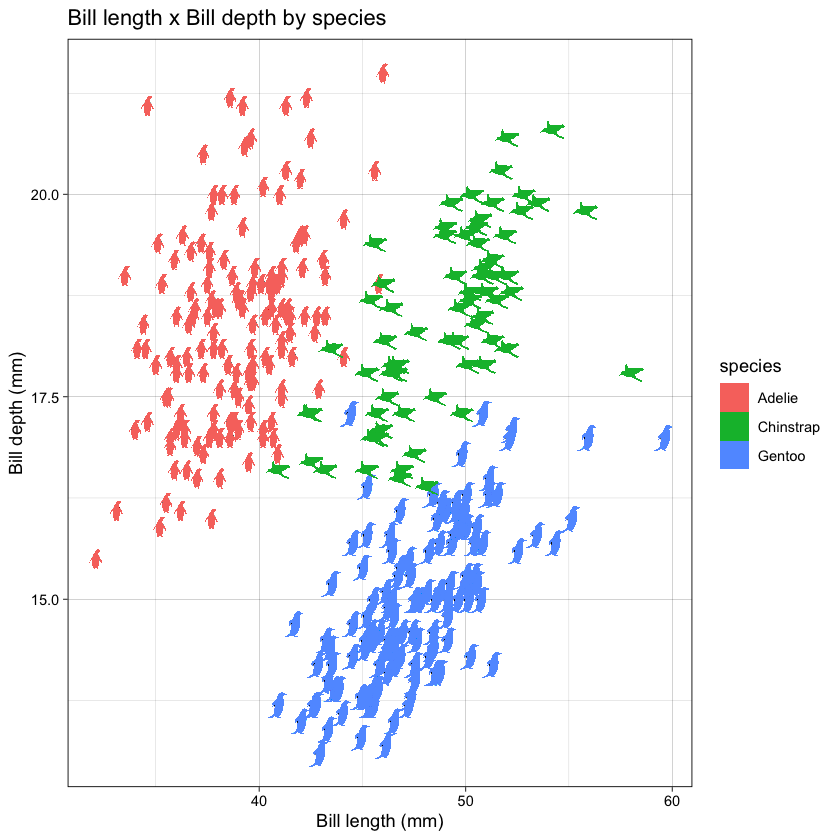

In [5]:
# Add legend
options(ggimage.keytype = "rect")

# Draw the plot
ggplot(data = penguins_img, aes(x = bill_length_mm, y = bill_depth_mm)) + 
  geom_point() + 
  theme_linedraw() + 
  geom_image(aes(image=image, color=species), size=.04) +
  ggtitle("Bill length x Bill depth by species") + 
  labs(x = "Bill length (mm)", y = "Bill depth (mm)")